In [ ]:
!pip install pandasai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.8/179.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 79.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.0/337.0 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 392.9/392.9 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.9/332.9 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: sqlglot
    Found existing installation: sqlglot 20.11.0
    Uninstalling sqlglot-20.11.0:
      Successful

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandasai import SmartDataframe

In [ ]:
# Inisiasi directory tempat data akan dibaca dan disimpan
path = '/content/drive/MyDrive/Course/Sales Data - New.xlsx'
# Read the Excel file
df = pd.read_excel(path)
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE
0,10100,30,100.00,2003-01-06,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium
1,10100,50,67.80,2003-01-06,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium
2,10100,22,86.51,2003-01-06,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small
3,10100,49,34.47,2003-01-06,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small
4,10101,25,100.00,2003-01-09,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium


In [ ]:
# Mencari ukuran data
df.shape

(2824, 10)

In [ ]:
# Melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERNUMBER      2824 non-null   int64         
 1   QUANTITYORDERED  2824 non-null   int64         
 2   PRICEEACH        2824 non-null   float64       
 3   ORDERDATE        2824 non-null   datetime64[ns]
 4   STATUS           2824 non-null   object        
 5   PRODUCTLINE      2824 non-null   object        
 6   PRODUCTCODE      2824 non-null   object        
 7   CUSTOMERNAME     2824 non-null   object        
 8   CITY             2824 non-null   object        
 9   DEALSIZE         2824 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 220.8+ KB


In [ ]:
# Cek missing value
df.isnull().sum()

ORDERNUMBER        0
QUANTITYORDERED    0
PRICEEACH          0
ORDERDATE          0
STATUS             0
PRODUCTLINE        0
PRODUCTCODE        0
CUSTOMERNAME       0
CITY               0
DEALSIZE           0
dtype: int64

In [ ]:
df_cleaned = df.copy()

In [ ]:
# Memperbaiki tipe data dari 'ORDERDATE' ke datetime
df_cleaned['ORDERDATE'] = pd.to_datetime(df_cleaned['ORDERDATE'])

# Konversi tipe data dari 'ORDERNUMBER' ke object
df_cleaned['ORDERNUMBER'] = df_cleaned['ORDERNUMBER'].astype('object')

# Membuat kolom baru
df_cleaned['SALES'] = df_cleaned['QUANTITYORDERED'] * df_cleaned['PRICEEACH']

print(df_cleaned.info)

<bound method DataFrame.info of      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERDATE      STATUS  \
0          10100               30     100.00 2003-01-06     Shipped   
1          10100               50      67.80 2003-01-06     Shipped   
2          10100               22      86.51 2003-01-06     Shipped   
3          10100               49      34.47 2003-01-06     Shipped   
4          10101               25     100.00 2003-01-09     Shipped   
...          ...              ...        ...        ...         ...   
2819       10425               49     100.00 2005-05-31  In Process   
2820       10425               31      33.24 2005-05-31  In Process   
2821       10425               41      86.68 2005-05-31  In Process   
2822       10425               11      43.83 2005-05-31  In Process   
2823       10425               18     100.00 2005-05-31  In Process   

           PRODUCTLINE PRODUCTCODE                  CUSTOMERNAME       CITY  \
0         Vintage Cars    S18_1749  

In [ ]:
df_cleaned.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE,SALES
0,10100,30,100.00,2003-01-06,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium,3000.00
1,10100,50,67.80,2003-01-06,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium,3390.00
2,10100,22,86.51,2003-01-06,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small,1903.22
3,10100,49,34.47,2003-01-06,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small,1689.03
4,10101,25,100.00,2003-01-09,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium,2500.00


In [ ]:
# Mencari duplicate data
duplicate = df_cleaned[df_cleaned.duplicated()]

# Display data yang duplicate
duplicate

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE,SALES
121,10111,28,64.33,2003-03-25,Shipped,Vintage Cars,S18_2957,Mini Wheels Co.,San Francisco,Small,1801.24


In [ ]:
# Handling duplicate data
dfnew = df_cleaned.drop_duplicates()
dfnew

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE,SALES
0,10100,30,100.00,2003-01-06,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium,3000.00
1,10100,50,67.80,2003-01-06,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium,3390.00
2,10100,22,86.51,2003-01-06,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small,1903.22
3,10100,49,34.47,2003-01-06,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small,1689.03
4,10101,25,100.00,2003-01-09,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium,2500.00
...,...,...,...,...,...,...,...,...,...,...,...
2819,10425,49,100.00,2005-05-31,In Process,Trucks and Buses,S24_2300,La Rochelle Gifts,Nantes,Medium,4900.00
2820,10425,31,33.24,2005-05-31,In Process,Classic Cars,S24_2840,La Rochelle Gifts,Nantes,Small,1030.44
2821,10425,41,86.68,2005-05-31,In Process,Trucks and Buses,S32_1268,La Rochelle Gifts,Nantes,Medium,3553.88
2822,10425,11,43.83,2005-05-31,In Process,Trucks and Buses,S32_2509,La Rochelle Gifts,Nantes,Small,482.13


In [ ]:
# Melihat informasi data
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2823 entries, 0 to 2823
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERNUMBER      2823 non-null   object        
 1   QUANTITYORDERED  2823 non-null   int64         
 2   PRICEEACH        2823 non-null   float64       
 3   ORDERDATE        2823 non-null   datetime64[ns]
 4   STATUS           2823 non-null   object        
 5   PRODUCTLINE      2823 non-null   object        
 6   PRODUCTCODE      2823 non-null   object        
 7   CUSTOMERNAME     2823 non-null   object        
 8   CITY             2823 non-null   object        
 9   DEALSIZE         2823 non-null   object        
 10  SALES            2823 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 329.2+ KB


In [ ]:
# Menampilkan kolom/variabel dengan tipe data string
data_string = list(dfnew.select_dtypes(include=['object']).columns)
dfnew[data_string].head()

,ORDERNUMBER,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE
0,10100,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium
1,10100,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium
2,10100,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small
3,10100,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small
4,10101,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium


In [ ]:
# Melihat summary dari data yang telah di-cleaning
dfnew.describe()

,QUANTITYORDERED,PRICEEACH,SALES
count,2823.000000,2823.000000,2823.000000
mean,35.092809,83.658544,2936.906408
std,9.741443,20.174277,1105.644284
min,6.000000,26.880000,482.130000
25%,27.000000,68.860000,2100.000000
50%,35.000000,95.700000,2800.000000
75%,43.000000,100.000000,3726.810000
max,97.000000,100.000000,9048.160000


In [ ]:
# Analisis deskriptif untuk kolom kategorikal
df_categorical = dfnew.select_dtypes(include=['object'])
df_categorical.describe()

,ORDERNUMBER,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE
count,2823,2823,2823,2823,2823,2823,2823
unique,307,6,7,109,92,73,3
top,10316,Shipped,Classic Cars,S18_3232,Euro Shopping Channel,Madrid,Medium
freq,18,2617,967,52,259,304,1384


In [ ]:
prod_line_sales = dfnew.groupby('PRODUCTLINE', as_index=False)['SALES'].sum()
prod_line_sales

,PRODUCTLINE,SALES
0,Classic Cars,2968546.40
1,Motorcycles,971086.29
2,Planes,877942.21
3,Ships,677940.40
4,Trains,203804.26
5,Trucks and Buses,947355.18
6,Vintage Cars,1644212.05


<Axes: xlabel='PRODUCTLINE', ylabel='SALES'>

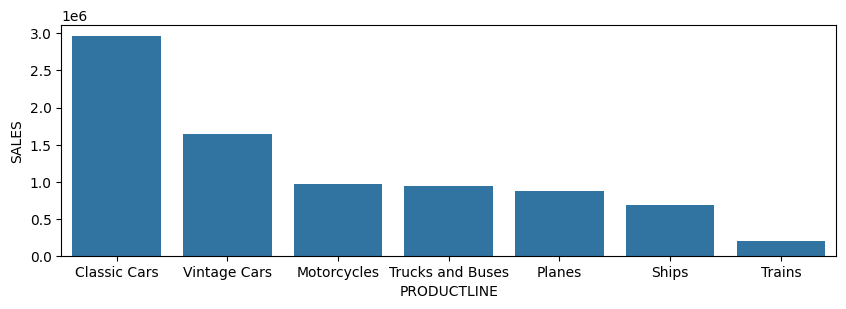

In [ ]:
plt.rcParams['figure.figsize'] = (10, 3)
# Mengurutkan nilai data sales dari terbesar ke terkecil
sns.barplot(x='PRODUCTLINE', y='SALES', data=prod_line_sales.sort_values('SALES', ascending=False))

In [ ]:
# Menampilkan sales performance over time
daily_sales = dfnew.groupby('ORDERDATE', as_index=False)['SALES'].sum()
daily_sales

,ORDERDATE,SALES
0,2003-01-06,9982.25
1,2003-01-09,8976.96
2,2003-01-10,5955.74
3,2003-01-29,47886.21
4,2003-01-31,35084.80
...,...,...
247,2005-05-13,24502.48
248,2005-05-17,46475.40
249,2005-05-29,47187.74
250,2005-05-30,14578.75


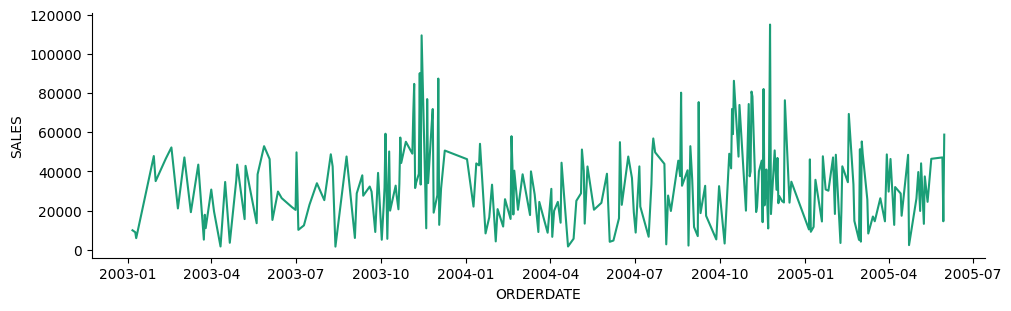

In [ ]:
# @title ORDERDATE vs SALES

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ORDERDATE']
  ys = series['SALES']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 3), layout='constrained')
df_sorted = daily_sales.sort_values('ORDERDATE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ORDERDATE')
_ = plt.ylabel('SALES')

In [ ]:
agg_deals = dfnew.groupby('DEALSIZE', as_index=False)['SALES'].sum()
agg_deals

,DEALSIZE,SALES
0,Large,738757.91
1,Medium,4961736.68
2,Small,2590392.20


<Axes: xlabel='DEALSIZE', ylabel='SALES'>

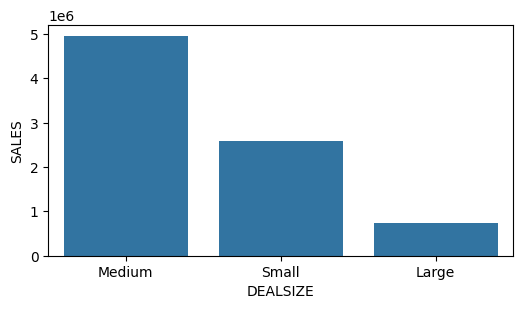

In [ ]:
plt.rcParams['figure.figsize'] = (6, 3)
sns.barplot(x='DEALSIZE', y='SALES', data=agg_deals.sort_values('SALES', ascending=False))

([<matplotlib.patches.Wedge at 0x78783f2de650>,
 [Text(1.057181943973772, 0.30391830701002015, 'Large'),
  Text(-0.8401748435434492, 0.7100043889137172, 'Medium'),
  Text(0.6113039049408558, -0.9144985160206994, 'Small')],
 [Text(0.5766446967129665, 0.1657736220054655, '8.9%'),
  Text(-0.4582771873873358, 0.38727512122566393, '59.8%'),
  Text(0.33343849360410316, -0.49881737237492685, '31.2%')])

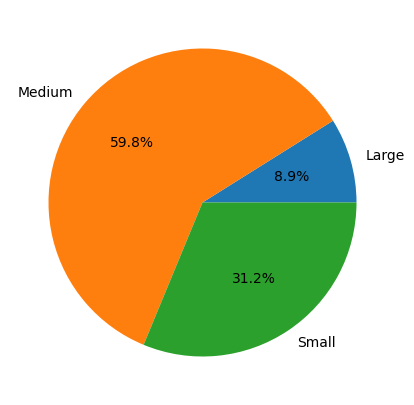

In [ ]:
plt.pie(agg_deals['SALES'], labels=agg_deals['DEALSIZE'], autopct='%1.1f%%')

In [ ]:
# Export data ke dalam format excel
dfnew.to_excel(path + 'Sales Data - Clean.xlsx', index=None)